## 1. Load & Explore Data

### 1.1 | Import Libraries

In [4]:
import pandas as pd
import numpy as np

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

#datetime
import datetime as dt

#set style for plots
sns.set(style="whitegrid")

# Warnings
import warnings
warnings.filterwarnings('ignore')


### 1.2 | Load the Dataset


In [7]:
df = pd.read_csv('C:/Users/Anshika/Projects/customer_insights_dashboard/data/ecommerce_data.csv', encoding='ISO-8859-1')
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### 1.3 | Data Overview



In [9]:
df.shape

(541909, 8)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [14]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [16]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [18]:
# check for missing values 
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

## 2. Data Cleaning 

In [21]:
# 2.1 Drop rows with missing CustomerID
# RFM is customer-level analysis, so CustomerID is essential
df = df.dropna(subset=['CustomerID'])

In [23]:
# 2.2 Remove negative or zero Quantity and UnitPrice
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

In [25]:
# 2.3 Convert InvoiceDate to datetime
# Required for calculating Recency
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [27]:
# 2.4 Create TotalPrice column
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [29]:
# 2.5 Check for duplicate rows
df.duplicated().sum()

5192

In [30]:
# drop duplicate rows 
df.drop_duplicates(inplace=True)

In [32]:
# check again
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  float64       
 7   Country      392692 non-null  object        
 8   TotalPrice   392692 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.0+ MB


In [35]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalPrice
count,392692.000000,392692,392692.000000,392692.000000,392692.000000
mean,13.119702,2011-07-10 19:13:07.771892480,3.125914,15287.843865,22.631500
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000,0.001000
25%,2.000000,2011-04-07 11:12:00,1.250000,13955.000000,4.950000
50%,6.000000,2011-07-31 12:02:00,1.950000,15150.000000,12.450000
75%,12.000000,2011-10-20 12:53:00,3.750000,16791.000000,19.800000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000,168469.600000
std,180.492832,NaN,22.241836,1713.539549,311.099224


In [37]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalPrice     0
dtype: int64

## 3. Exploratory Data Analysis (EDA)

### 3.1 | Univariate Analysis

#### 3.1.1 | Quantity

Note - Extreme values (above 99th percentile) were excluded to better visualize the true distribution

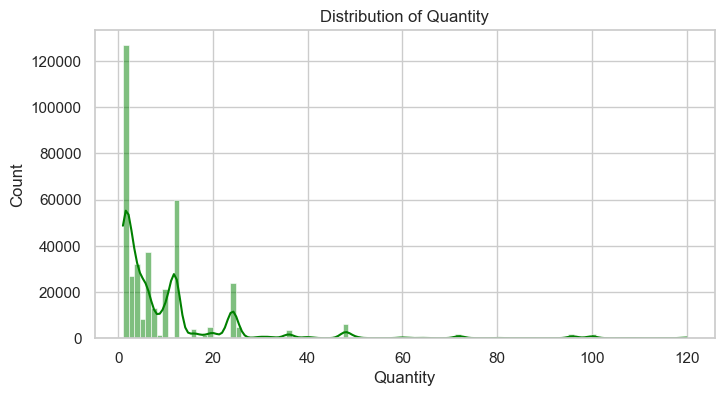

In [43]:

q_99 = df['Quantity'].quantile(0.99)

plt.figure(figsize=(8,4))
sns.histplot(df[df['Quantity'] <= q_99]['Quantity'], bins=100, kde=True, color='green')
plt.title("Distribution of Quantity")
plt.xlabel("Quantity")
plt.ylabel("Count")
plt.show()



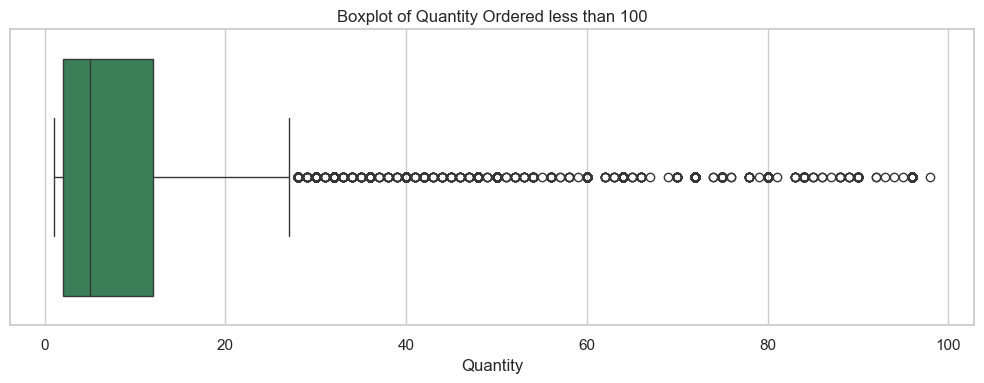

In [44]:
# Boxplot of Quantity (less than 100)
plt.figure(figsize=(10, 4))
sns.boxplot(x=df[df['Quantity'] < 100]['Quantity'], color='seagreen')
plt.title('Boxplot of Quantity Ordered less than 100')
plt.xlabel('Quantity')
plt.tight_layout()
plt.show()



#### 3.1.2 | UnitPrice


Most products are priced between  £0 and  £10, with very few beyond  £50. I excluded extreme outliers to reveal the actual pricing pattern of typical items.

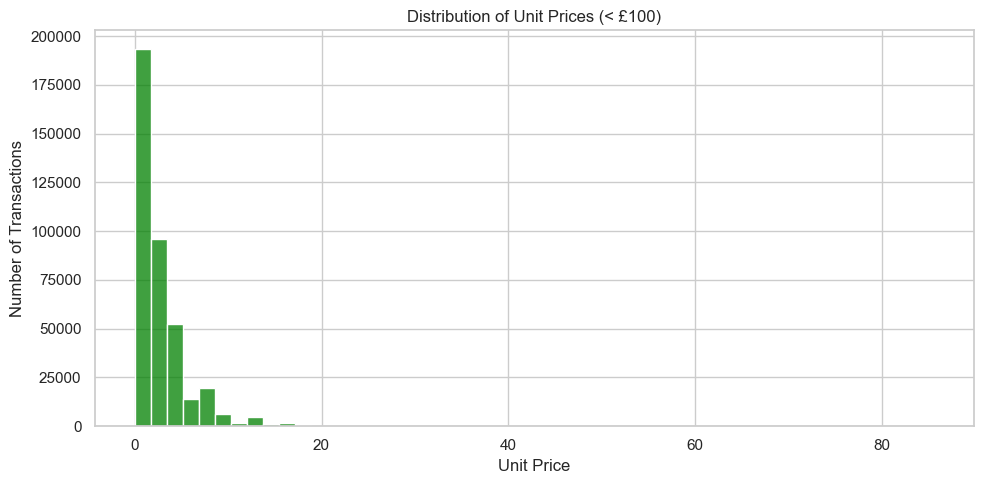

In [54]:

filtered_prices = df[df['UnitPrice'] < 100]['UnitPrice']

plt.figure(figsize=(10, 5))
sns.histplot(filtered_prices, bins=50, color='green')
plt.title('Distribution of Unit Prices (< £100)')
plt.xlabel('Unit Price')
plt.ylabel('Number of Transactions')
plt.tight_layout()
plt.show()


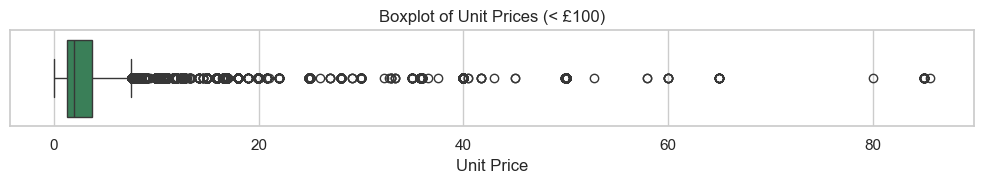

In [56]:
# Boxplot of Unit Price (excluding extreme outliers)
plt.figure(figsize=(10, 2))
sns.boxplot(x=df[df['UnitPrice'] < 100]['UnitPrice'], color='seagreen')
plt.title('Boxplot of Unit Prices (< £100)')
plt.xlabel('Unit Price')
plt.tight_layout()
plt.show()



####  3.1.3 | TotalPrice

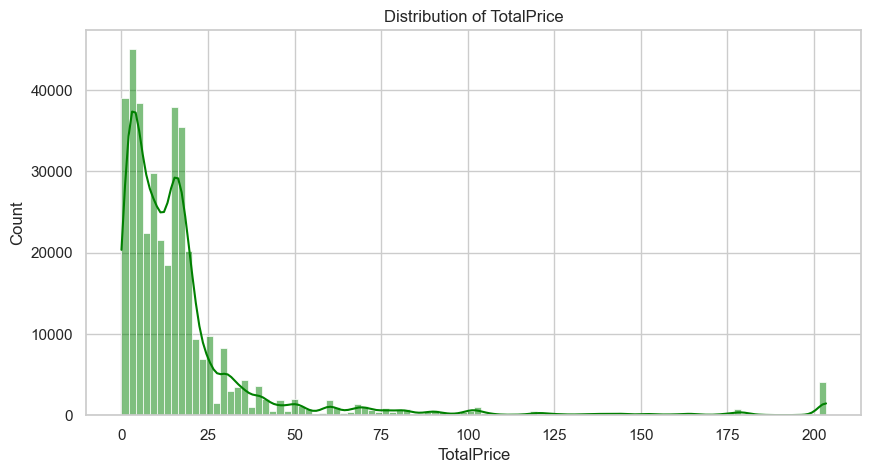

In [36]:

totalprice_clipped = df['TotalPrice'].clip(upper=df['TotalPrice'].quantile(0.99))

plt.figure(figsize=(10, 5))
sns.histplot(totalprice_clipped, bins=100, kde=True, color = 'green')
plt.title('Distribution of TotalPrice')
plt.xlabel('TotalPrice')
plt.ylabel('Count')
plt.show()


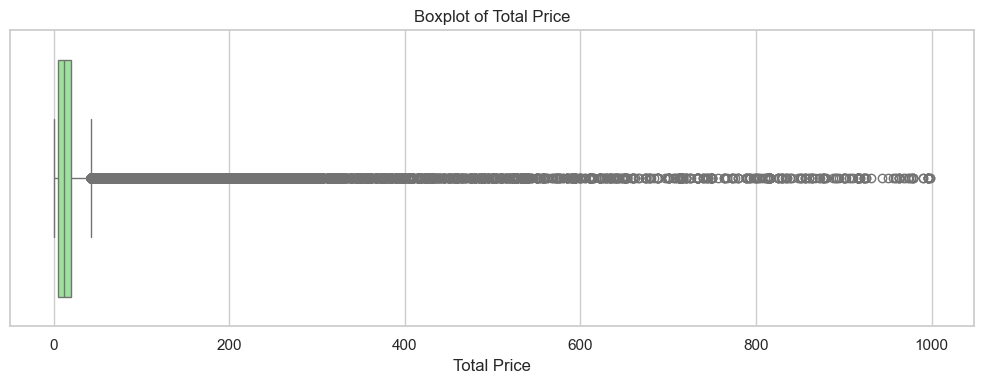

In [37]:
#boxplot for TotalPrice 
plt.figure(figsize=(10, 4))
sns.boxplot(x=df[df['TotalPrice'] < 1000]['TotalPrice'], color='lightgreen')
plt.title('Boxplot of Total Price')
plt.xlabel('Total Price')
plt.tight_layout()
plt.show()


####  3.1.4 | Top selling countries (excluding UK ) 

The United Kingdom dominated the dataset due to the company being UK-based. To visualize variation among international customers, I temporarily excluded UK from this plot to better highlight top-performing non-UK countries.

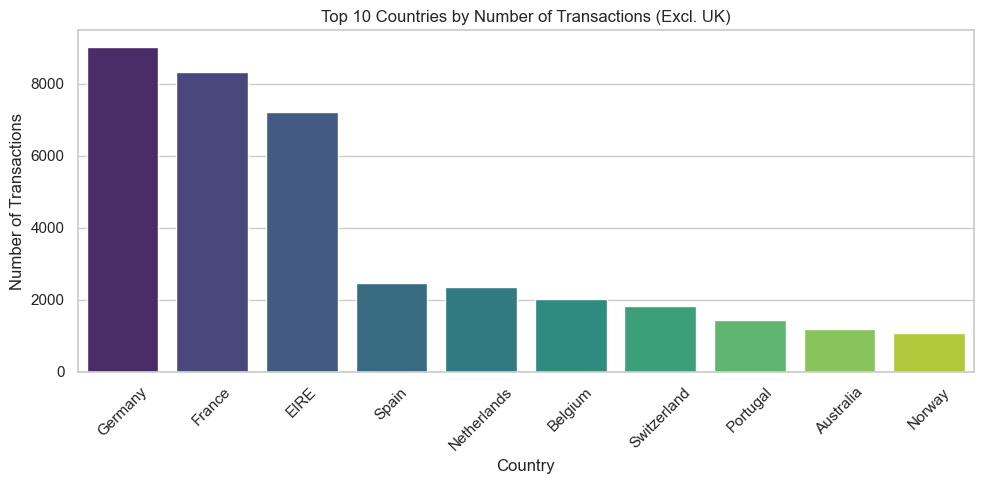

In [41]:
# Top 10 countries (excluding United Kingdom which dominates most datasets)
top_countries = df[df['Country'] != 'United Kingdom']['Country'].value_counts().head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='viridis')
plt.title('Top 10 Countries by Number of Transactions (Excl. UK)')
plt.ylabel('Number of Transactions')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


####  3.1.5 | Distribution of Transactions by Country

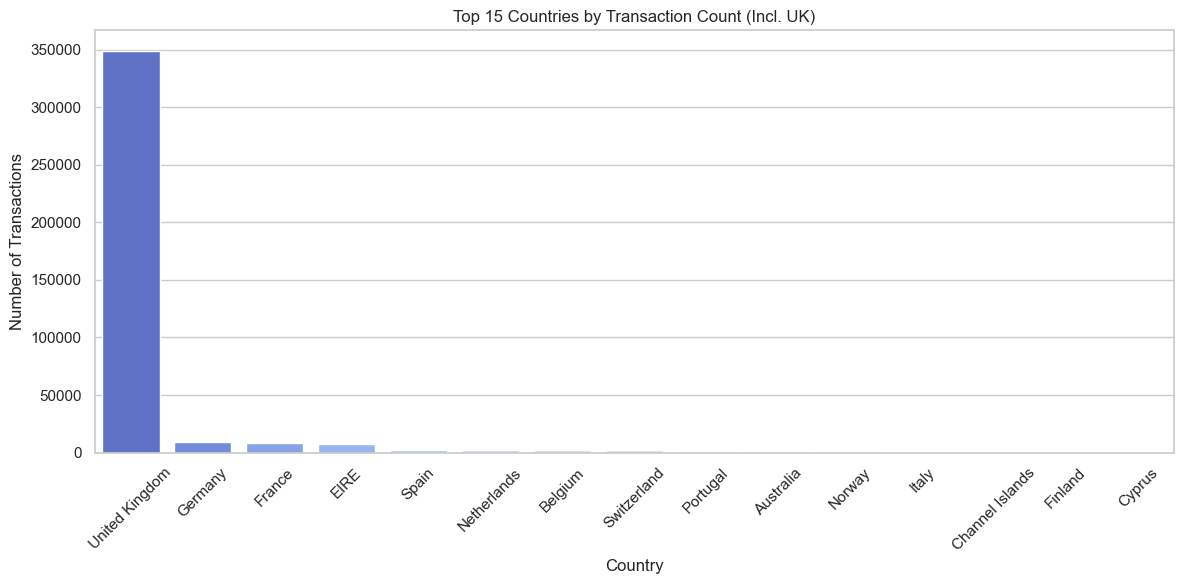

In [43]:
# Distribution of transactions across all countries
country_counts = df['Country'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=country_counts.index[:15], y=country_counts.values[:15], palette='coolwarm')
plt.title('Top 15 Countries by Transaction Count (Incl. UK)')
plt.ylabel('Number of Transactions')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 3.2 | Bivariate Analysis Between Features

#### 3.2.1 | Unit Price vs Quantity

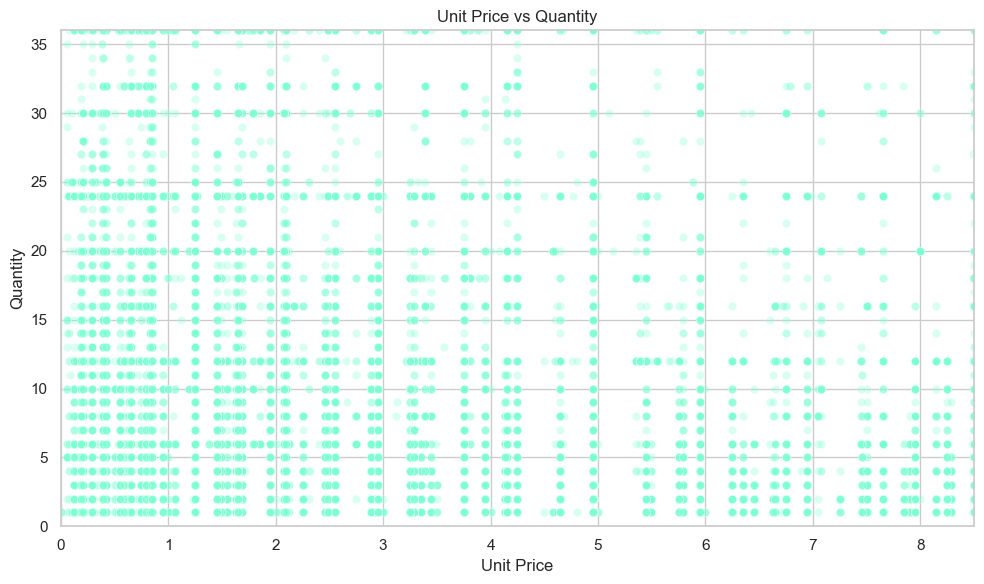

In [46]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='UnitPrice', y='Quantity', alpha=0.3, color='aquamarine')
plt.title('Unit Price vs Quantity')
plt.xlabel('Unit Price')
plt.ylabel('Quantity')
plt.ylim(0, df['Quantity'].quantile(0.95))  # clip extreme quantity values
plt.xlim(0, df['UnitPrice'].quantile(0.95))  # clip extreme price values
plt.grid(True)
plt.tight_layout()
plt.show()


#### 3.2.2 | Unit Price vs Total Price

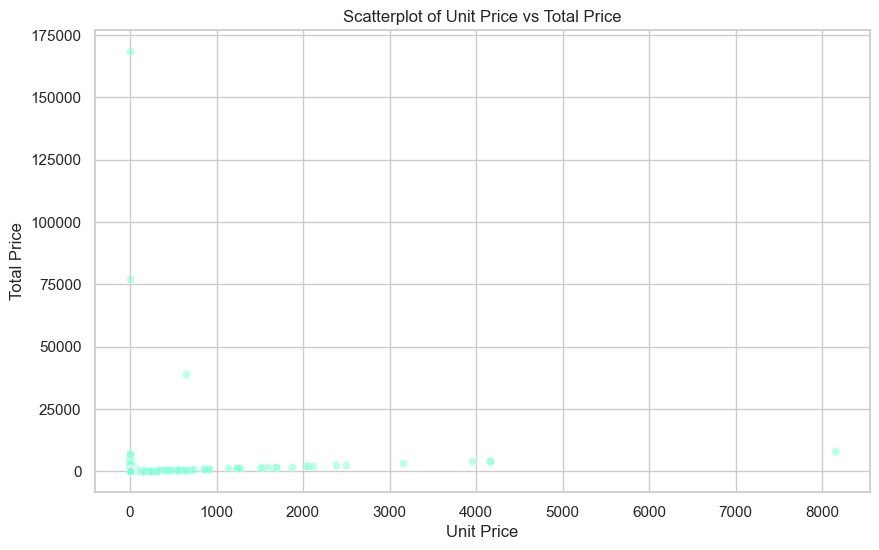

In [48]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='UnitPrice', y='TotalPrice', alpha=0.5, color ='aquamarine')
plt.title('Scatterplot of Unit Price vs Total Price')
plt.xlabel('Unit Price')
plt.ylabel('Total Price')
plt.grid(True)
plt.show()


#### 3.2.3 | Total Price vs Country 

The TotalPrice boxplot by country shows that the majority of transactions are concentrated within the lower price range (under 100 units). To better visualize the interquartile range and detect outliers, the y-axis has been limited to 0–100. This helps highlight patterns across countries while avoiding distortion caused by a small number of high-value purchases.

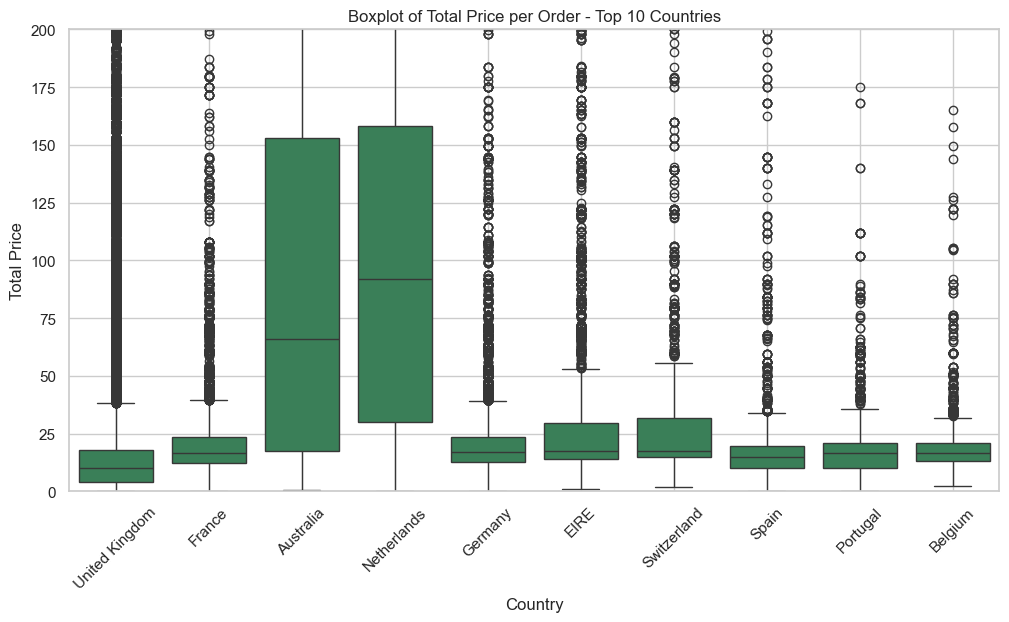

In [51]:
# get top 10 countries by order count
top_countries = df['Country'].value_counts().head(10).index

# filter dataframe
df_top = df[df['Country'].isin(top_countries)]

# plot boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_top, x='Country', y='TotalPrice', color='seagreen')
plt.ylim(0, 200) 
plt.title('Boxplot of Total Price per Order - Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Total Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


#### 3.2.4 | Monthly Sales Trend


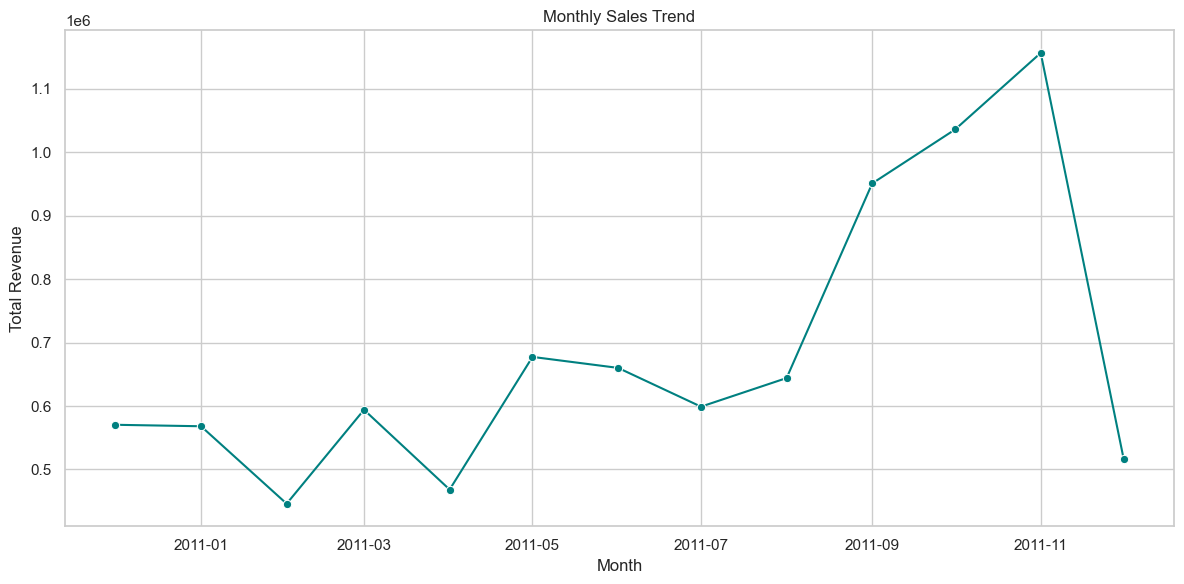

In [53]:
# Create a new InvoiceMonth column
df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period('M')

# Group by month and sum the total price
monthly_sales = df.groupby('InvoiceMonth')['TotalPrice'].sum().reset_index()

# Convert Period to datetime for plotting
monthly_sales['InvoiceMonth'] = monthly_sales['InvoiceMonth'].dt.to_timestamp()

# Plot
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales, x='InvoiceMonth', y='TotalPrice', marker='o', color='teal')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()


#### 3.2.5 | Daily Sales Trend


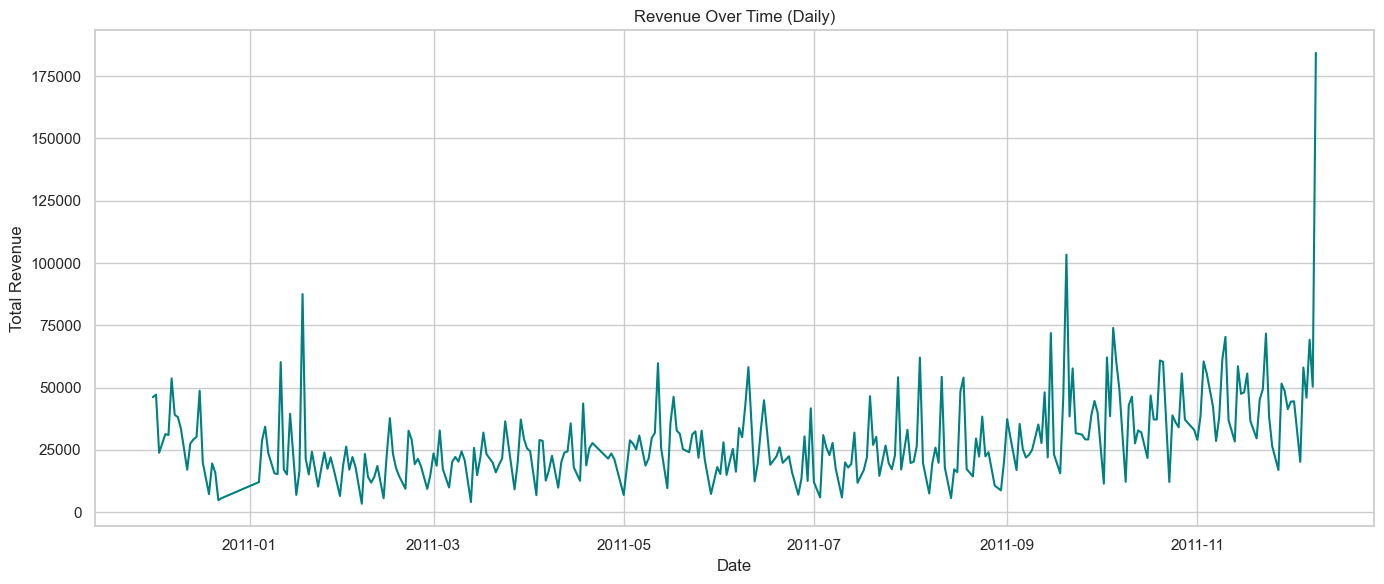

In [55]:
# Create a new column with just the date (not time)
df['InvoiceDay'] = df['InvoiceDate'].dt.date

# Group by date and sum revenue
daily_revenue = df.groupby('InvoiceDay')['TotalPrice'].sum()

# Plot
plt.figure(figsize=(14,6))
daily_revenue.plot(kind='line', color='teal')
plt.title('Revenue Over Time (Daily)')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()


#### 3.2.6 | Top Selling Products

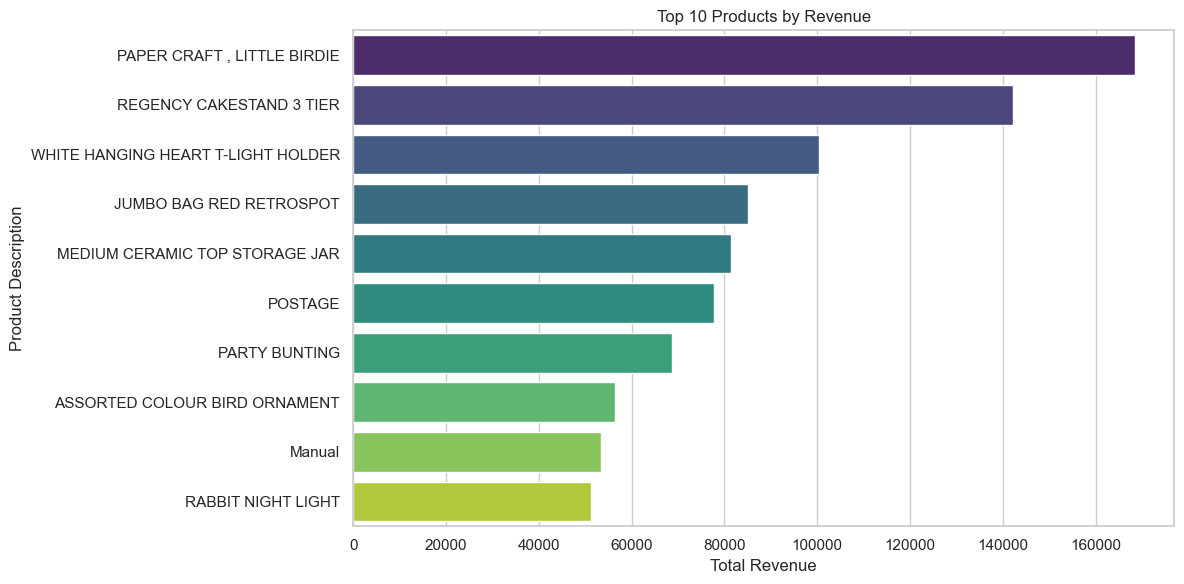

In [57]:
top_products = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title('Top 10 Products by Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Product Description')
plt.tight_layout()
plt.show()


#### 3.2.7 | Revenue by Country

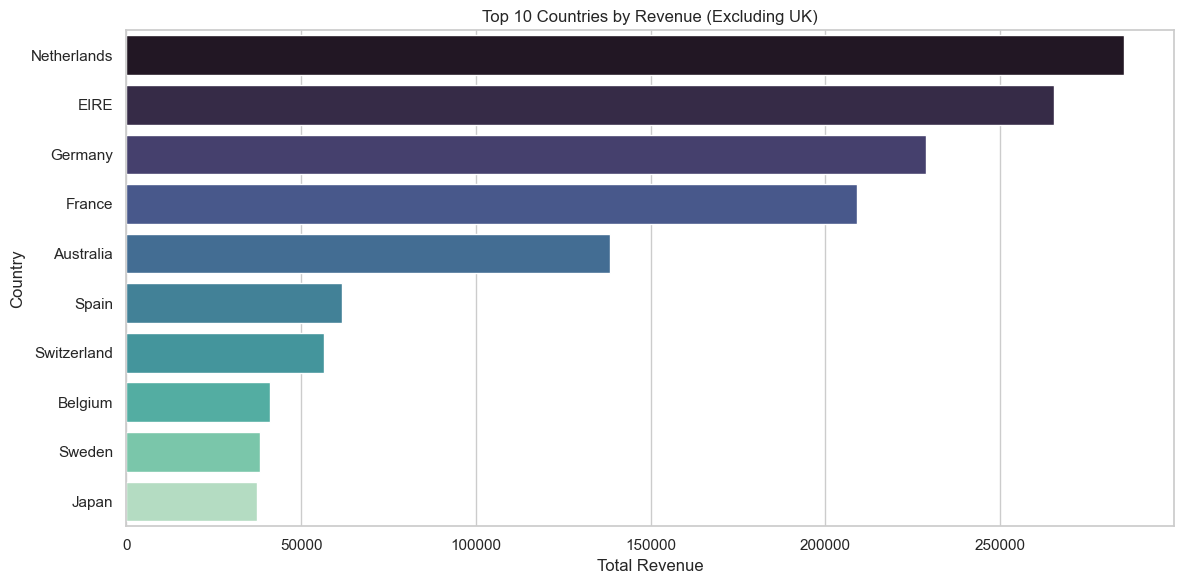

In [59]:
country_revenue = df[df['Country'] != 'United Kingdom'].groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=country_revenue.values, y=country_revenue.index, palette='mako')
plt.title('Top 10 Countries by Revenue (Excluding UK)')
plt.xlabel('Total Revenue')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


#### 3.2.8 | Top 10 Customers by Revenue

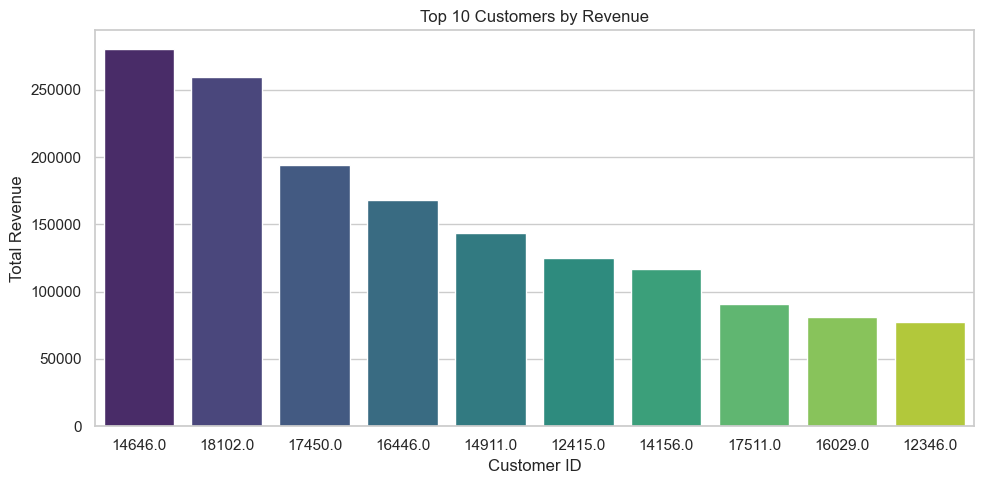

In [61]:
# Group by CustomerID and calculate total revenue
customer_revenue = df.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 5))
sns.barplot(x=customer_revenue.index.astype(str), y=customer_revenue.values, palette='viridis')
plt.title('Top 10 Customers by Revenue')
plt.xlabel('Customer ID')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()


## 4. RFM Analysis

### 4.1 | Prepare the Data 

In [64]:

# Set analysis date as one day after the last invoice date
analysis_date = df['InvoiceDate'].max() + dt.timedelta(days=1)

# Create RFM table grouped by CustomerID
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (analysis_date - x.max()).days, # recency
    'InvoiceNo': 'nunique', # frequency
    'TotalPrice': 'sum' # monetary
})

# Rename columns
rfm.rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalPrice': 'Monetary'
}, inplace=True)

# Display the first few rows
rfm.head()


,Recency,Frequency,Monetary
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,19,1,1757.55
12350.0,310,1,334.40


 ### 4.2 | RFM Scoring

In [66]:
# make a copy of the original RFM table
rfm_scored = rfm.copy()

# score Recency: lower is better (more recent)
# so we reverse the labels (5 = most recent, 1 = least recent)
rfm_scored['R_score'] = pd.qcut(rfm_scored['Recency'], 5, labels=[5, 4, 3, 2, 1]).astype(int)

# score Frequency: higher is better
# use rank to break ties before using qcut
rfm_scored['F_score'] = pd.qcut(rfm_scored['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5]).astype(int)

# score Monetary: higher is better
rfm_scored['M_score'] = pd.qcut(rfm_scored['Monetary'], 5, labels=[1, 2, 3, 4, 5]).astype(int)

# combine the scores into one RFM Score string
rfm_scored['RFM_Score'] = (
    rfm_scored['R_score'].astype(str) +
    rfm_scored['F_score'].astype(str) +
    rfm_scored['M_score'].astype(str)
)


In [67]:
rfm_scored.head()

,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score
CustomerID,,,,,,,
12346.0,326,1,77183.60,1,1,5,115
12347.0,2,7,4310.00,5,5,5,555
12348.0,75,4,1797.24,2,4,4,244
12349.0,19,1,1757.55,4,1,4,414
12350.0,310,1,334.40,1,1,2,112


### 4.3 | Assign RFM Segments to Customers

In [69]:

import re

# Define function to assign RFM Segment

def rfm_segment(row):
    r, f, m = row['R_score'], row['F_score'], row['M_score']
    
    if r >= 4 and f >= 4:
        return 'Champion'
    elif r >= 3 and f >= 3:
        return 'Loyal Customer'
    elif r >= 2 and f >= 2:
        return 'Potential Loyalist'
    elif r <= 2 and f <= 2 and m <= 2:
        return 'Lost'
    elif r <= 2 and f <= 3:
        return 'At Risk'
    else:
        return 'Others'

# Apply the function
rfm_scored['Segment'] = rfm_scored.apply(rfm_segment, axis=1)

# check sample output
rfm_scored.head()



,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_Score,Segment
CustomerID,,,,,,,,
12346.0,326,1,77183.60,1,1,5,115,At Risk
12347.0,2,7,4310.00,5,5,5,555,Champion
12348.0,75,4,1797.24,2,4,4,244,Potential Loyalist
12349.0,19,1,1757.55,4,1,4,414,Others
12350.0,310,1,334.40,1,1,2,112,Lost


###  4.4 | Visualize RFM Metrics

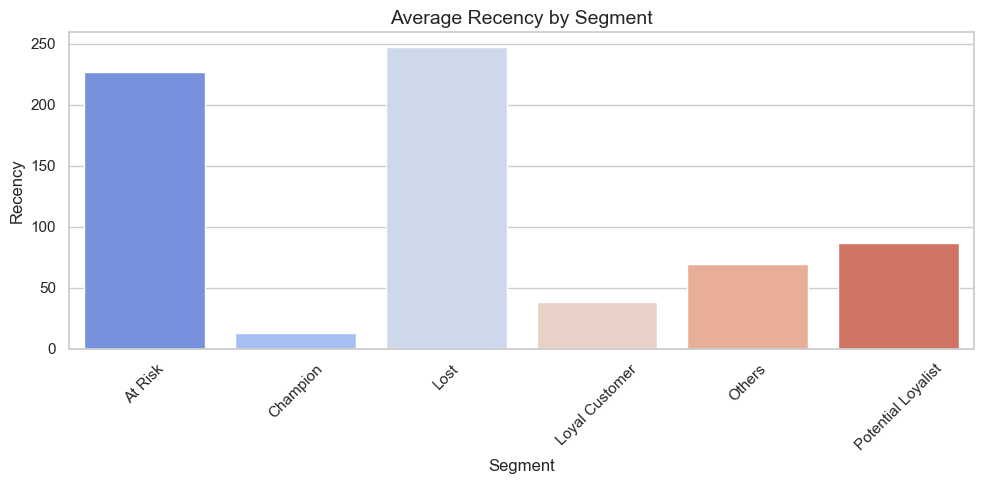

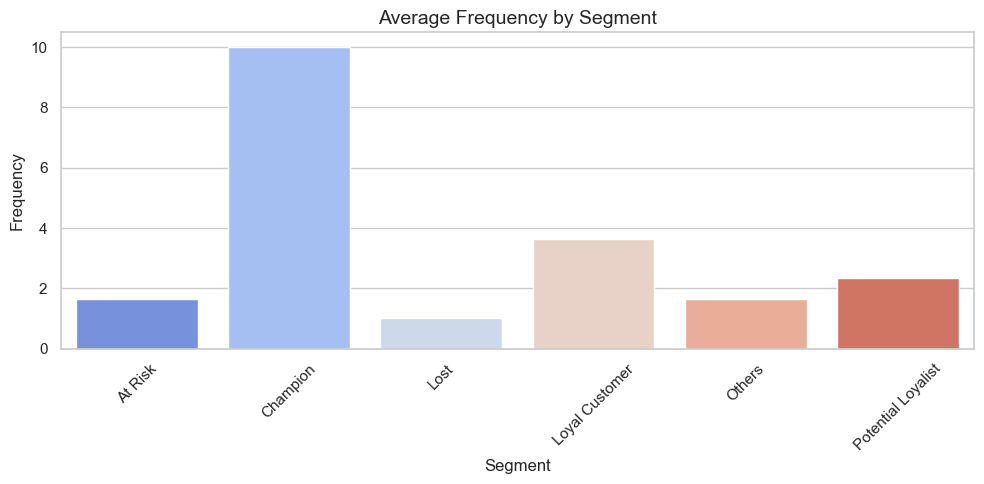

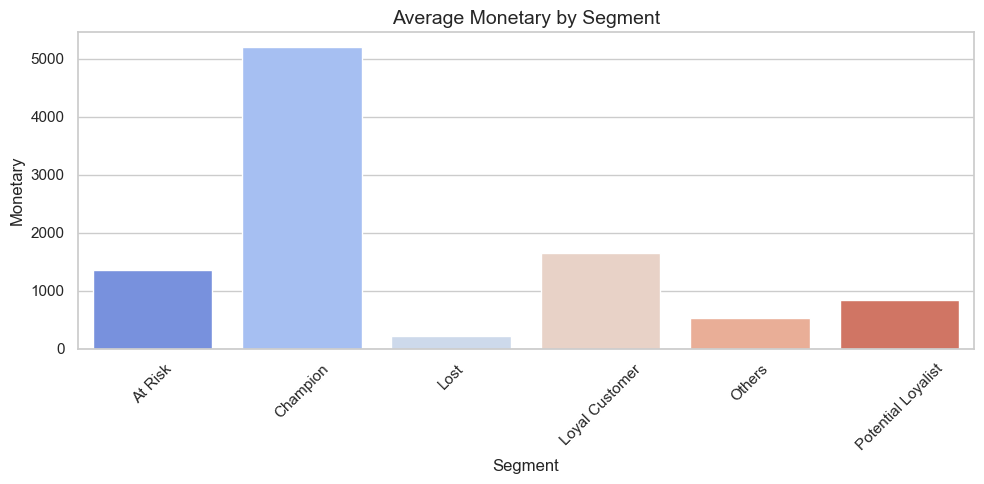

In [71]:
# group by Segment and calculate average R, F, M values
rfm_avg = rfm_scored.groupby('Segment')[['Recency', 'Frequency', 'Monetary']].mean().reset_index()

# define metrics to visualize
metrics = ['Recency', 'Frequency', 'Monetary']

# plot each metric
for metric in metrics:
    plt.figure(figsize=(10, 5))
    sns.barplot(data=rfm_avg, x='Segment', y=metric, palette='coolwarm')
    plt.title(f'Average {metric} by Segment', fontsize=14)
    plt.xlabel('Segment')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


## 5. Merge and Save Cleaned RFM Segmented Data

In [1]:
#rfm_scored.to_csv("rfm_segmented_data.csv", index=False)

# df_merged = df.merge(
#     rfm_scored[['Recency', 'Frequency', 'Monetary',
#                 'R_score', 'F_score', 'M_score',
#                 'RFM_Score', 'Segment']],
#     left_on='CustomerID',
#     right_index=True,
#     how='left'
# )

# # Save the full dataset
# df_merged.to_csv('cleaned_data_with_rfm.csv', index=False)

# print('dataset saved')



Further visualizations and business insights are presented in the accompanying Power BI dashboard.